<a href="https://colab.research.google.com/github/pdmxddd/virtual_competition/blob/main/exitexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("train.csv")
data.head(10)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical
5,MSC_30580.0,Una Pàgina per Chopin,NaN,1.047458,0.436620,149956.385,0.015206,0.960473,Scale G Sharp,0.161042,-28.116,NaN,Major,0.043902,136.232,Duet,0.156638,Classical
6,MSC_28346.0,Love More,64.265,0.000459,0.968723,203145.857,-1.000000,0.000384,Scale C Sharp,0.079220,-7.266,Male,Major,0.052014,104.957,Band,0.484246,Rap
7,MSC_33942.0,I Think I ll Just Stay Here And Drink,60.375,0.086018,0.621977,248135.177,0.420478,0.075501,Scale A,0.168890,-16.505,Female,Major,0.039190,87.894,Solo,NaN,Rock
8,MSC_25657.0,Juke Box Hero,73.420,0.090830,0.380147,275490.630,0.714246,0.000000,Scale A,0.089873,-5.972,Both,Major,0.070437,176.647,Duet,0.555169,Rock
9,MSC_54552.0,Shine on Harvest Moon,34.034,1.014646,0.672051,207299.190,0.048039,0.146346,Scale A Sharp,0.110850,-27.213,Both,Major,0.065935,117.155,Duet,0.590628,Jazz


In [9]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [10]:
# Check the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

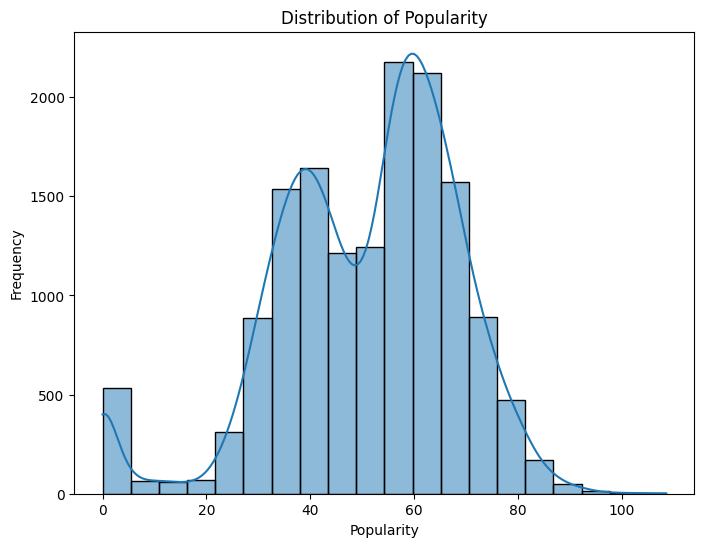

In [11]:
# Check the distribution of the target variable (assuming 'popularity' is the target)
plt.figure(figsize=(8, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

<ipython-input-12-1c6ce6a15cc9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


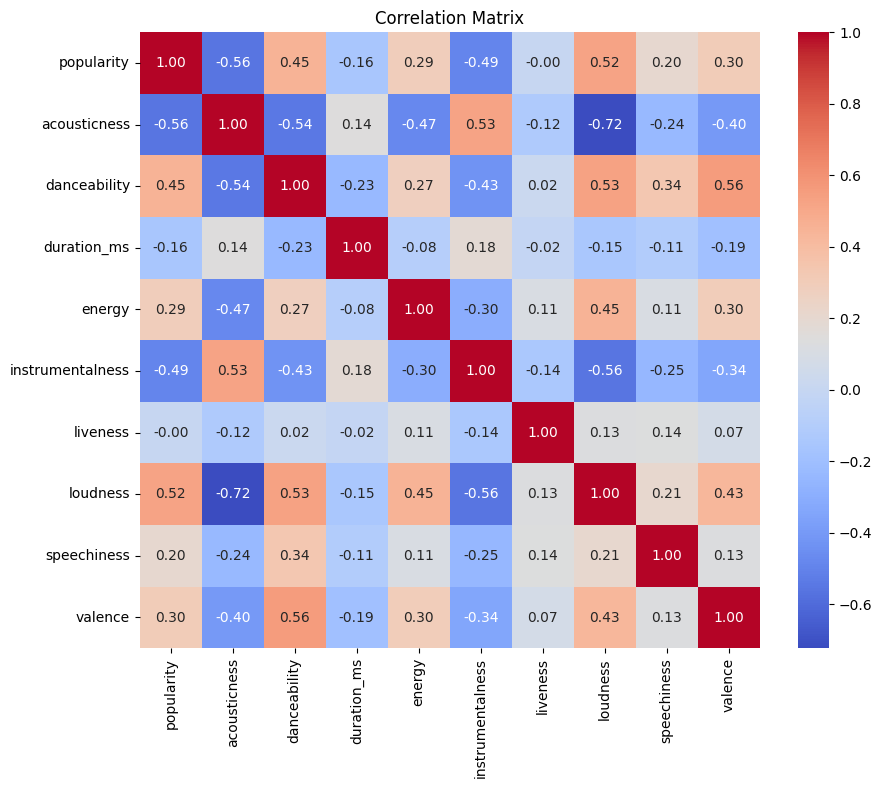

In [12]:
# Correlation matrix to identify relationships between numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

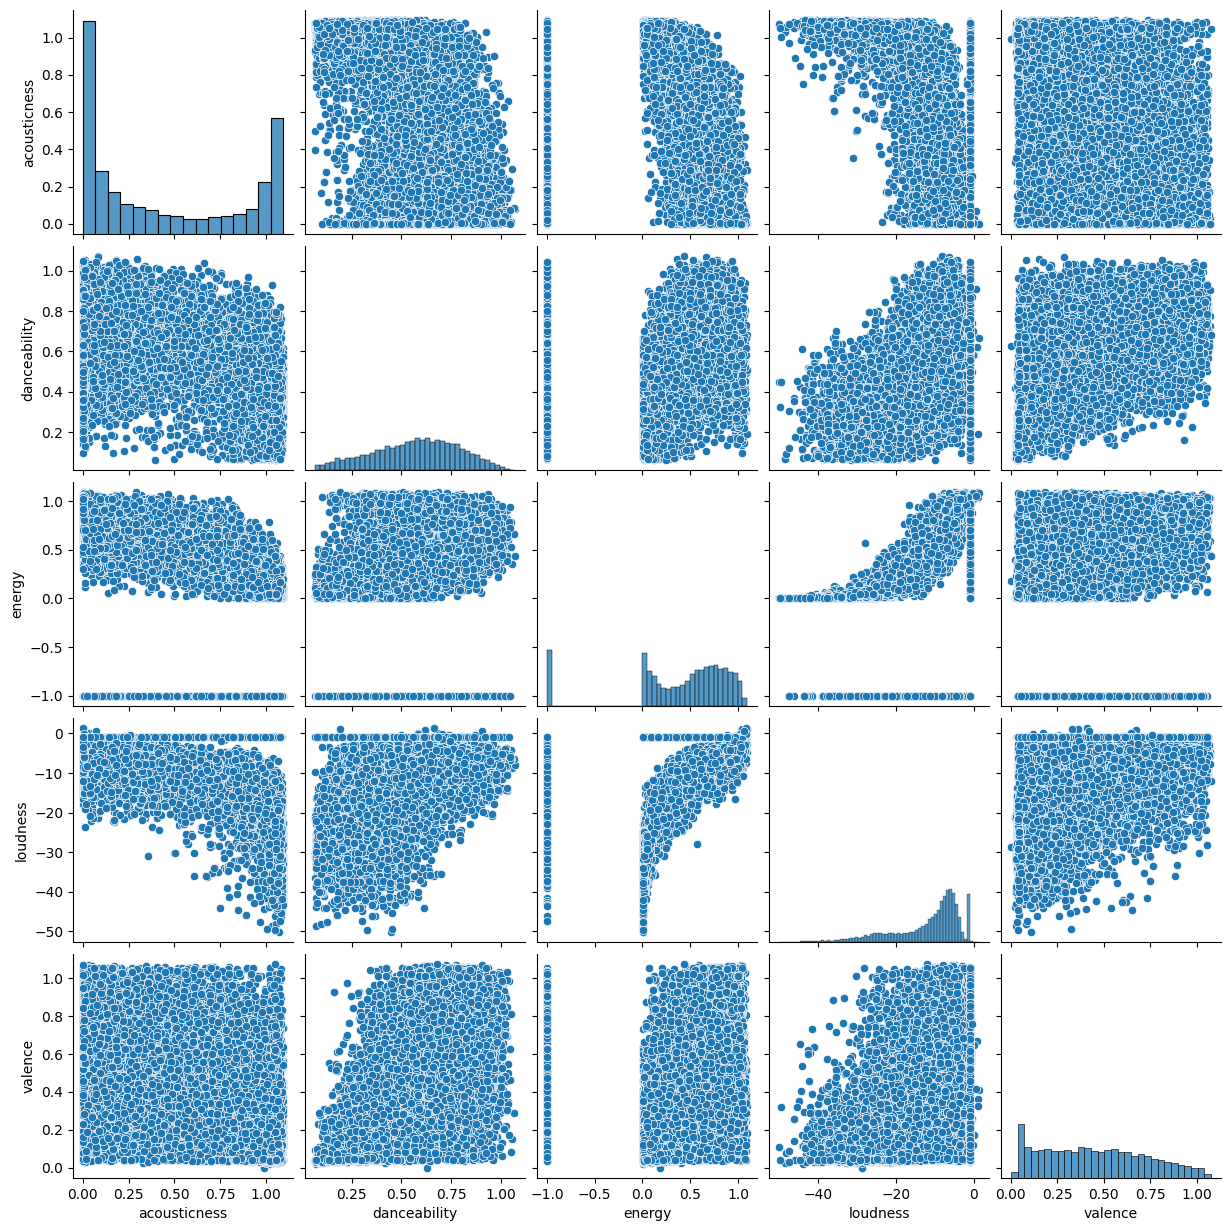

In [13]:
# Pairplot for scatterplots and histograms of numeric variables
sns.pairplot(data, vars=['acousticness', 'danceability', 'energy', 'loudness', 'valence'])
plt.show()

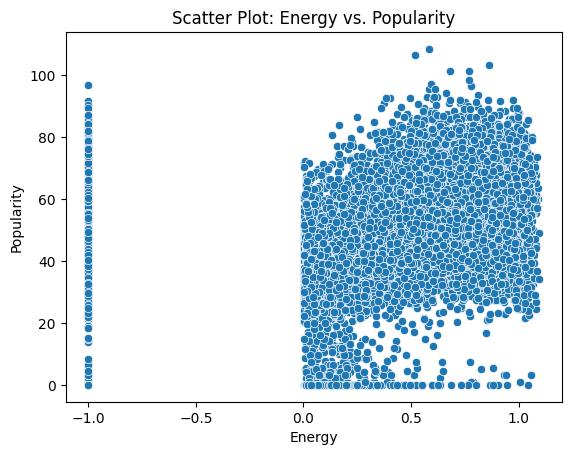

In [14]:
# Explore relationships between features and the target variable
sns.scatterplot(x='energy', y='popularity', data=data)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Energy vs. Popularity')
plt.show()

In [15]:
# Pairwise feature distribution (if applicable)
sns.pairplot(data, hue=, diag_kind='kde')
plt.show()

SyntaxError: ignored

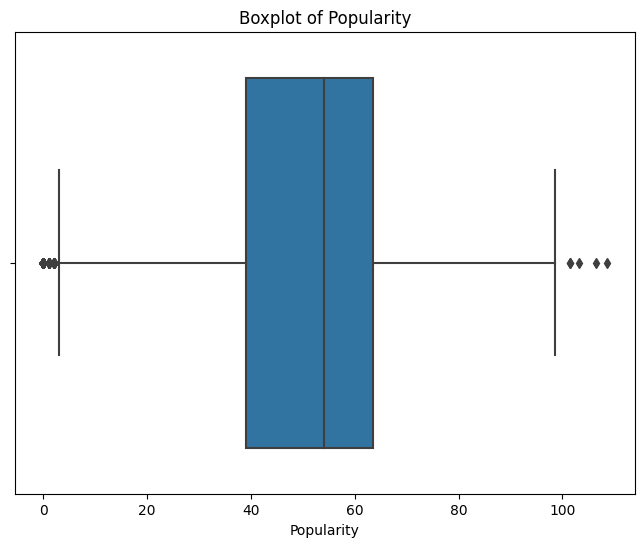

In [16]:
# Boxplot to identify outliers in 'popularity'
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity', data=data)
plt.xlabel('Popularity')
plt.title('Boxplot of Popularity')
plt.show()

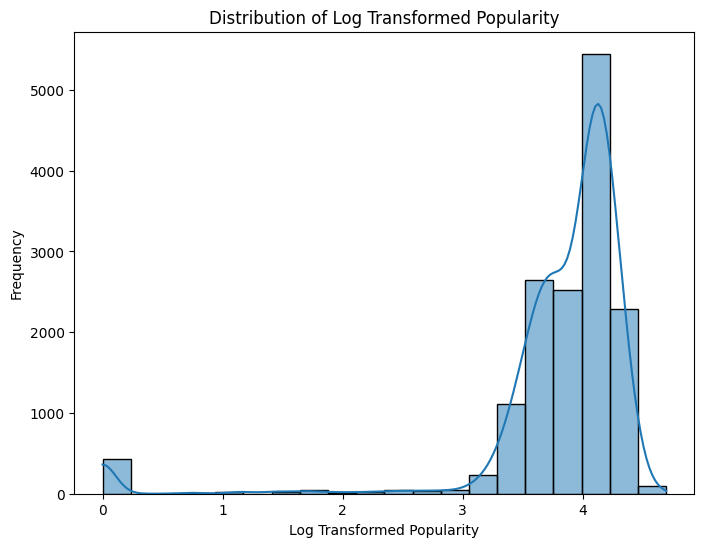

In [17]:
# Log transformation (if 'popularity' is positively skewed)
data['log_popularity'] = np.log1p(data['popularity'])
plt.figure(figsize=(8, 6))
sns.histplot(data['log_popularity'], bins=20, kde=True)
plt.xlabel('Log Transformed Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Popularity')
plt.show()

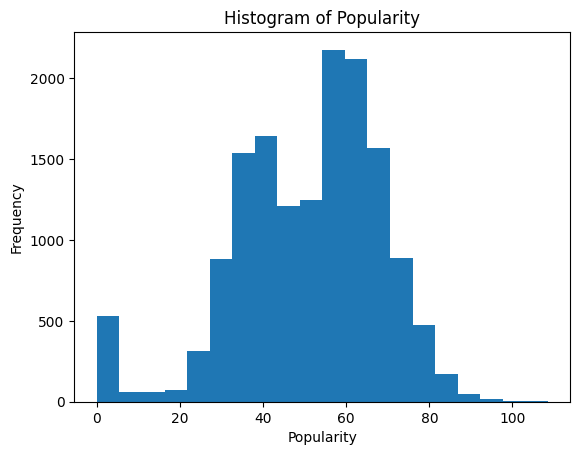

In [18]:
# Data visualization
# Example: Histogram of the 'popularity' column
plt.hist(data['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of Popularity')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [20]:
# Drop columns not needed for modeling (if any)
# Example: Drop 'instance_id' and 'track_name' if not needed
data.drop(columns=['instance_id', 'track_name'], inplace=True)

In [21]:
#Encode categorical variables (if applicable)
# Example: Encoding 'key', 'voice_gender', 'mode', 'tempo', 'musician_category', and 'music_genre'
label_encoder = LabelEncoder()
categorical_columns = ['key', 'voice_gender', 'mode', 'tempo', 'musician_category', 'music_genre']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [22]:
# Standardize numeric features (if needed)
# Example: Standardize all numeric columns except 'popularity'
scaler = StandardScaler()
numeric_columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
                   'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [23]:
# Log transformation (if 'popularity' is positively skewed)
data['log_popularity'] = np.log1p(data['popularity'])
# Drop the original 'popularity' column if using 'log_popularity'
data.drop(columns=['popularity'], inplace=True)

In [24]:
# Save the preprocessed data (if desired)
# Example: Save to 'preprocessed_data.csv'
# data.to_csv('preprocessed_data.csv', index=False)

# Display the first few rows of the preprocessed data
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre,log_popularity
0,1.255733,0.048372,-0.212815,-0.456830,-0.667777,7,-0.292940,-0.290720,3,1,-0.473360,5291,0,0.532319,4,3.915577
1,1.348924,0.546118,-0.202572,-0.313218,-0.667700,0,-0.121244,-0.241776,2,0,-0.534460,12331,0,-0.339839,4,4.108034
2,-1.023775,1.850107,0.161414,0.837212,-0.667777,5,-0.948670,0.764909,1,1,0.222502,615,0,0.664206,5,4.500065
3,-1.047176,0.214760,-0.375009,1.057199,-0.667221,5,-0.433295,0.849521,0,1,0.672854,12331,1,1.920381,6,4.038867
4,0.987718,-1.346094,1.033859,-0.607328,-0.660820,9,-0.370003,-1.766175,1,2,-0.542123,1466,0,-1.359936,0,3.830704


In [25]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['log_popularity'])  # Features
y = data['log_popularity']  # Target variable

In [26]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

ValueError: ignored

In [28]:
data.dropna(inplace=True)
# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

ValueError: ignored

In [29]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre,log_popularity
0,1.255733,0.048372,-0.212815,-0.456830,-0.667777,7,-0.292940,-0.290720,3,1,-0.473360,5291,0,0.532319,4,3.915577
1,1.348924,0.546118,-0.202572,-0.313218,-0.667700,0,-0.121244,-0.241776,2,0,-0.534460,12331,0,-0.339839,4,4.108034
2,-1.023775,1.850107,0.161414,0.837212,-0.667777,5,-0.948670,0.764909,1,1,0.222502,615,0,0.664206,5,4.500065
3,-1.047176,0.214760,-0.375009,1.057199,-0.667221,5,-0.433295,0.849521,0,1,0.672854,12331,1,1.920381,6,4.038867
4,0.987718,-1.346094,1.033859,-0.607328,-0.660820,9,-0.370003,-1.766175,1,2,-0.542123,1466,0,-1.359936,0,3.830704


In [30]:
X = data.drop(columns=['log_popularity'])  # Features
y = data['log_popularity']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Model Evaluation

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

In [33]:
# Calculate Root Mean Squared Error (RMSE) and R-squared (R2)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))  # Convert back from log
r2 = r2_score(np.exp(y_test), np.exp(y_pred))  # Convert back from log

print("Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation:
Root Mean Squared Error (RMSE): 11.46
R-squared (R2): 0.60


In [34]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

In [ ]:
# Train the final model with the best hyperparameters
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

In [ ]:
# Model Evaluation

# Predict on the test set
y_pred = final_model.predict(X_test)

In [ ]:
# Calculate Root Mean Squared Error (RMSE) and R-squared (R2)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))  # Convert back from log
r2 = r2_score(np.exp(y_test), np.exp(y_pred))  # Convert back from log

print("Final Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
